In [1]:
import datetime

import numpy as np
import pandas as pd

import vectorbt as vbt

In [2]:
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=729)

interval = "1h"

In [3]:
symbols = [
    "BTC-USD", 
    "ETH-USD"
]

windows = [
    14,
    21
]

In [4]:
price = vbt.YFData.download(
    symbols = symbols,
    missing_index='drop',
    interval=interval,
    start = start_date,
    end = end_date
).get('Close')

/home/oskar/anaconda3/envs/vectorbt/lib/python3.10/site-packages/vectorbt/data/base.py:527: UserWarning: Symbols have mismatching index. Dropping missing data points.
  data = cls.align_index(data, missing=missing_index)


In [5]:
price

symbol,BTC-USD,ETH-USD
Datetime,,
2021-05-27 02:00:00+00:00,37855.457031,2714.602051
2021-05-27 03:00:00+00:00,37629.343750,2676.726074
2021-05-27 04:00:00+00:00,37772.964844,2706.156250
2021-05-27 05:00:00+00:00,38195.292969,2734.851074
2021-05-27 06:00:00+00:00,38318.781250,2760.128418
...,...,...
2023-05-25 22:00:00+00:00,26462.509766,1807.715698
2023-05-25 23:00:00+00:00,26475.779297,1806.021484
2023-05-26 00:00:00+00:00,26453.787109,1805.079224


<Axes: xlabel='Datetime'>

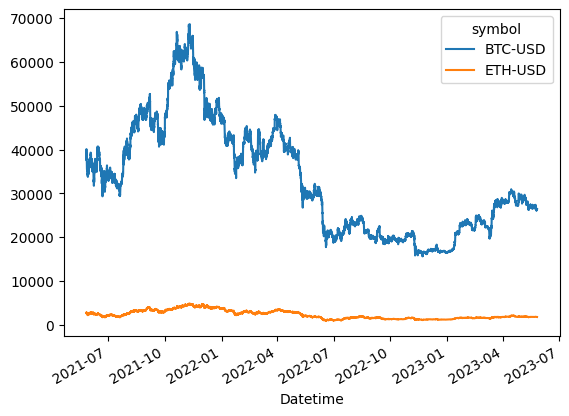

In [6]:
price.plot()

In [7]:
rsi: vbt.indicators.basic.RSI = vbt.RSI.run(price, window=windows)

In [8]:
rsi.rsi

rsi_window                        14                    21           
symbol                       BTC-USD    ETH-USD    BTC-USD    ETH-USD
Datetime                                                             
2021-05-27 02:00:00+00:00        NaN        NaN        NaN        NaN
2021-05-27 03:00:00+00:00        NaN        NaN        NaN        NaN
2021-05-27 04:00:00+00:00        NaN        NaN        NaN        NaN
2021-05-27 05:00:00+00:00        NaN        NaN        NaN        NaN
2021-05-27 06:00:00+00:00        NaN        NaN        NaN        NaN
...                              ...        ...        ...        ...
2023-05-25 22:00:00+00:00  66.487105  71.277126  66.168263  70.176855
2023-05-25 23:00:00+00:00  64.524392  67.702987  66.046190  67.183241
2023-05-26 00:00:00+00:00  66.130938  68.874462  62.501763  65.613511
2023-05-26 01:00:00+00:00  59.399773  62.680001  59.064256  65.429018
2023-05-26 02:00:00+00:00  52.154084  52.303291  57.783432  63.472229

[17241 rows x 4 columns]

In [9]:
print(rsi.rsi.columns)
rsi.plot(column=(14, 'BTC-USD'))

MultiIndex([(14, 'BTC-USD'),
            (14, 'ETH-USD'),
            (21, 'BTC-USD'),
            (21, 'ETH-USD')],
           names=['rsi_window', 'symbol'])


FigureWidget({
    'data': [{'name': 'RSI',
              'showlegend': True,
              'type': 'scatter',
              'uid': '63eb1a90-5510-41e7-a649-a3cc19972966',
              'x': array([datetime.datetime(2021, 5, 27, 2, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2021, 5, 27, 3, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2021, 5, 27, 4, 0, tzinfo=datetime.timezone.utc), ...,
                          datetime.datetime(2023, 5, 26, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 5, 26, 1, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 5, 26, 2, 0, tzinfo=datetime.timezone.utc)],
                         dtype=object),
              'y': array([        nan,         nan,         nan, ..., 66.13093777, 59.39977334,
                          52.15408404])}],
    'layout': {'height': 350,
               'legend': {'orientation': 'h',
   

In [10]:
entries = rsi.rsi_crossed_below(30)
exits = rsi.rsi_crossed_above(70)

In [11]:
# entries, exits

In [12]:
# portfolio
pf = vbt.Portfolio.from_signals(price, entries, exits, freq=interval)

In [13]:
# pf.stats(column=(14, 'BTC-USD'))
pf.stats()

/tmp/ipykernel_87267/2522381368.py:2: UserWarning:

Object has multiple columns. Aggregating using <function mean at 0x7f13e40745e0>. Pass column to select a single column/group.



Start                         2021-05-27 02:00:00+00:00
End                           2023-05-26 02:00:00+00:00
Period                                718 days 09:00:00
Start Value                                       100.0
End Value                                     61.641578
Total Return [%]                             -38.358422
Benchmark Return [%]                         -31.890757
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                               65.15485
Max Drawdown Duration                 581 days 09:45:00
Total Trades                                      163.0
Total Closed Trades                              162.75
Total Open Trades                                  0.25
Open Trade PnL                                -0.173038
Win Rate [%]                                  62.833292
Best Trade [%]                                 9.735621
Worst Trade [%]                              -31

In [14]:
pf.total_return()

rsi_window  symbol 
14          BTC-USD   -0.374348
            ETH-USD   -0.308510
21          BTC-USD   -0.493794
            ETH-USD   -0.357685
Name: total_return, dtype: float64

In [15]:
pf.plot(column=(14, 'BTC-USD'))

FigureWidget({
    'data': [{'legendgroup': '0',
              'line': {'color': '#1f77b4'},
              'name': 'Close',
              'showlegend': True,
              'type': 'scatter',
              'uid': '17c11323-5936-429d-9ab1-367a956ab135',
              'x': array([datetime.datetime(2021, 5, 27, 2, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2021, 5, 27, 3, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2021, 5, 27, 4, 0, tzinfo=datetime.timezone.utc), ...,
                          datetime.datetime(2023, 5, 26, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 5, 26, 1, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 5, 26, 2, 0, tzinfo=datetime.timezone.utc)],
                         dtype=object),
              'xaxis': 'x',
              'y': array([37855.45703125, 37629.34375   , 37772.96484375, ..., 26453.78710938,
               